**Business Problem Understanding - 

Uber is a multinational transportation network company that operates a platform connecting riders with drivers through a mobile app. It was founded in 2009 and has since become one of the most well-known examples of a ride-hailing service. Uber allows users to request a ride from their current location to a desired destination using their smartphone. The app matches the user with an available driver in the area, and the driver arrives to pick up the passenger.

Uber offers various types of services, including UberX (standard car), UberXL (larger vehicles), UberBlack (luxury vehicles), and UberPOOL (shared rides with other passengers traveling in the same direction). The fares for rides are calculated based on factors such as distance traveled, time spent on the trip, and demand at the time of the request.

Uber has gained popularity for its convenience, ease of use, and competitive pricing compared to traditional taxi services. It has expanded its operations to numerous cities around the world and has also introduced other services like food delivery (Uber Eats) and package delivery (Uber Connect)

**Load the Dataset & Necessary Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore') 

In [2]:
#Q.1 show the 1st 5 records(head)

In [3]:
df_uber = pd.read_csv('My Uber Drives - 2016.csv')
df_uber.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
df_uber.tail() #last 5 records 

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


**Data Understanding

In [5]:
df_uber.shape

(1156, 7)

In [6]:
df_uber.size

8092

In [7]:
df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [8]:
df_uber.isnull().any()

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [9]:
df_uber.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [10]:
df_uber.isnull().values.sum()

507

In [11]:
df_uber.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [13]:
df_uber.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [14]:
df_uber[['START_DATE*']]

,START_DATE*
0,1/1/2016 21:11
1,1/2/2016 1:25
2,1/2/2016 20:25
3,1/5/2016 17:31
4,1/6/2016 14:42
...,...
1151,12/31/2016 13:24
1152,12/31/2016 15:03
1153,12/31/2016 21:32
1154,12/31/2016 22:08


In [15]:
df_uber[['START_DATE*']].value_counts()

START_DATE*     
6/28/2016 23:34     2
1/1/2016 21:11      1
6/1/2016 13:10      1
6/11/2016 17:50     1
6/11/2016 17:34     1
                   ..
12/27/2016 7:02     1
12/27/2016 19:19    1
12/27/2016 16:34    1
12/27/2016 14:49    1
Totals              1
Name: count, Length: 1155, dtype: int64

In [16]:
df_uber[['START_DATE*']].values

array([['1/1/2016 21:11'],
       ['1/2/2016 1:25'],
       ['1/2/2016 20:25'],
       ...,
       ['12/31/2016 21:32'],
       ['12/31/2016 22:08'],
       ['Totals']], dtype=object)

In [17]:
df_uber[['START_DATE*']].nunique()

START_DATE*    1155
dtype: int64

In [18]:
df_uber[['CATEGORY*']]

,CATEGORY*
0,Business
1,Business
2,Business
3,Business
4,Business
...,...
1151,Business
1152,Business
1153,Business
1154,Business


In [19]:
df_uber[['CATEGORY*']].values

array([['Business'],
       ['Business'],
       ['Business'],
       ...,
       ['Business'],
       ['Business'],
       [nan]], dtype=object)

In [20]:
df_uber[['CATEGORY*']].value_counts()

CATEGORY*
Business     1078
Personal       77
Name: count, dtype: int64

In [21]:
df_uber[['CATEGORY*']].nunique()

CATEGORY*    2
dtype: int64

In [22]:
df_uber[['END_DATE*']]

,END_DATE*
0,1/1/2016 21:17
1,1/2/2016 1:37
2,1/2/2016 20:38
3,1/5/2016 17:45
4,1/6/2016 15:49
...,...
1151,12/31/2016 13:42
1152,12/31/2016 15:38
1153,12/31/2016 21:50
1154,12/31/2016 23:51


In [23]:
df_uber[['END_DATE*']].values

array([['1/1/2016 21:17'],
       ['1/2/2016 1:37'],
       ['1/2/2016 20:38'],
       ...,
       ['12/31/2016 21:50'],
       ['12/31/2016 23:51'],
       [nan]], dtype=object)

In [24]:
df_uber[['END_DATE*']].value_counts()

END_DATE*       
6/28/2016 23:59     2
1/1/2016 21:17      1
6/1/2016 10:47      1
6/11/2016 17:39     1
6/11/2016 17:16     1
                   ..
12/27/2016 7:14     1
12/27/2016 19:50    1
12/27/2016 16:58    1
12/27/2016 15:03    1
9/6/2016 17:49      1
Name: count, Length: 1154, dtype: int64

In [25]:
df_uber[['END_DATE*']].nunique()

END_DATE*    1154
dtype: int64

In [26]:
df_uber[['START*']]

,START*
0,Fort Pierce
1,Fort Pierce
2,Fort Pierce
3,Fort Pierce
4,Fort Pierce
...,...
1151,Kar?chi
1152,Unknown Location
1153,Katunayake
1154,Gampaha


In [27]:
df_uber[['START*']].values

array([['Fort Pierce'],
       ['Fort Pierce'],
       ['Fort Pierce'],
       ...,
       ['Katunayake'],
       ['Gampaha'],
       [nan]], dtype=object)

In [28]:
df_uber[['START*']].value_counts()

START*           
Cary                 201
Unknown Location     148
Morrisville           85
Whitebridge           68
Islamabad             57
                    ... 
Flatiron District      1
Florence               1
Fuquay-Varina          1
Gampaha                1
Winston Salem          1
Name: count, Length: 177, dtype: int64

In [29]:
df_uber[['START*']].nunique()

START*    177
dtype: int64

In [30]:
df_uber[['STOP*']]

,STOP*
0,Fort Pierce
1,Fort Pierce
2,Fort Pierce
3,Fort Pierce
4,West Palm Beach
...,...
1151,Unknown Location
1152,Unknown Location
1153,Gampaha
1154,Ilukwatta


In [31]:
df_uber[['STOP*']].values

array([['Fort Pierce'],
       ['Fort Pierce'],
       ['Fort Pierce'],
       ...,
       ['Gampaha'],
       ['Ilukwatta'],
       [nan]], dtype=object)

In [32]:
df_uber[['STOP*']].value_counts()

STOP*           
Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
                   ... 
Hog Island            1
Hell's Kitchen        1
Hayesville            1
Harden Place          1
Winston Salem         1
Name: count, Length: 188, dtype: int64

In [33]:
df_uber[['STOP*']].nunique()

STOP*    188
dtype: int64

In [34]:
df_uber[['MILES*']]

,MILES*
0,5.1
1,5.0
2,4.8
3,4.7
4,63.7
...,...
1151,3.9
1152,16.2
1153,6.4
1154,48.2


In [35]:
df_uber[['MILES*']].values

array([[5.10000e+00],
       [5.00000e+00],
       [4.80000e+00],
       ...,
       [6.40000e+00],
       [4.82000e+01],
       [1.22047e+04]])

In [36]:
df_uber[['MILES*']].value_counts()

MILES* 
9.9        28
3.1        26
2.1        19
10.4       19
3.0        19
           ..
22.5        1
22.4        1
22.3        1
21.9        1
12204.7     1
Name: count, Length: 257, dtype: int64

In [37]:
df_uber[['MILES*']].nunique()

MILES*    257
dtype: int64

In [38]:
df_uber[['PURPOSE*']]

,PURPOSE*
0,Meal/Entertain
1,NaN
2,Errand/Supplies
3,Meeting
4,Customer Visit
...,...
1151,Temporary Site
1152,Meeting
1153,Temporary Site
1154,Temporary Site


In [39]:
df_uber[['PURPOSE*']].values

array([['Meal/Entertain'],
       [nan],
       ['Errand/Supplies'],
       ...,
       ['Temporary Site'],
       ['Temporary Site'],
       [nan]], dtype=object)

In [40]:
df_uber[['PURPOSE*']].value_counts()

PURPOSE*       
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: count, dtype: int64

In [41]:
df_uber[['PURPOSE*']].nunique()

PURPOSE*    10
dtype: int64

In [44]:
continous = ['START_DATE*','END_DATE*','MILES*']

discrete_categorical = ['CATEGORY*','START*','STOP*']


In [45]:
df_uber[continous].describe()

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [46]:
df = df_uber.dropna()
df.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [47]:
df_uber[discrete_categorical].describe()

,CATEGORY*,START*,STOP*
count,1155,1155,1155
unique,2,177,188
top,Business,Cary,Cary
freq,1078,201,203


**Get The Unique Start Destination

In [48]:
destination = df_uber['START*'].dropna()
unique = set(destination)
unique

{'Agnew',
 'Almond',
 'Apex',
 'Arabi',
 'Arlington',
 'Arlington Park at Amberly',
 'Asheville',
 'Austin',
 'Banner Elk',
 'Bellevue',
 'Berkeley',
 'Boone',
 'Briar Meadow',
 'Bryson City',
 'Burtrose',
 'CBD',
 'Capitol One',
 'Cary',
 'Central',
 'Chalmette',
 'Chapel Hill',
 'Chessington',
 'College Avenue',
 'Colombo',
 'Columbia Heights',
 'Congress Ave District',
 'Connecticut Avenue',
 'Convention Center District',
 'Cory',
 'Couples Glen',
 'Covington',
 'Coxville',
 'Daytona Beach',
 'Downtown',
 'Durham',
 'Eagan Park',
 'Eagle Rock',
 'East Austin',
 'East Elmhurst',
 'East Harlem',
 'Eastgate',
 'Edgehill Farms',
 'El Cerrito',
 'Elk Park',
 'Elmhurst',
 'Emeryville',
 'Fairmont',
 'Farmington Woods',
 'Fayetteville Street',
 'Financial District',
 'Flatiron District',
 'Florence',
 'Fort Pierce',
 'Fuquay-Varina',
 'Galveston',
 'Gampaha',
 'Georgian Acres',
 'Gulfton',
 'Hayesville',
 'Hazelwood',
 "Hell's Kitchen",
 'Heritage Pines',
 'Holly Springs',
 'Houston',
 'Hu

In [49]:
len(unique)

177

**Get The Unique End Destination

In [50]:
destination = df_uber['STOP*'].dropna()
unique = set(destination)
unique

{'Agnew',
 'Alief',
 'Almond',
 'Apex',
 'Arabi',
 'Arlington',
 'Arlington Park at Amberly',
 'Arts District',
 'Asheville',
 'Banner Elk',
 'Bay Farm Island',
 'Bellevue',
 'Berkeley',
 'Boone',
 'Briar Meadow',
 'Bryson City',
 'Burtrose',
 'Bywater',
 'CBD',
 'Capitol One',
 'Cary',
 'Cedar Hill',
 'Central',
 'Chalmette',
 'Chapel Hill',
 'Chessington',
 'College Avenue',
 'Colombo',
 'Columbia Heights',
 'Congress Ave District',
 'Convention Center District',
 'Cory',
 'Covington',
 'Coxville',
 'Daytona Beach',
 'Depot Historic District',
 'Downtown',
 'Durham',
 'Eagle Rock',
 'East Elmhurst',
 'East Harlem',
 'Edgehill Farms',
 'El Cerrito',
 'Elk Park',
 'Emeryville',
 'Farmington Woods',
 'Faubourg Marigny',
 'Financial District',
 'Florence',
 'Fort Pierce',
 'French Quarter',
 'Fuquay-Varina',
 'Galveston',
 'Gampaha',
 'Gramercy-Flatiron',
 'Greater Greenspoint',
 'Gulfton',
 'Harden Place',
 'Hayesville',
 'Hazelwood',
 "Hell's Kitchen",
 'Heritage Pines',
 'Hog Island',

In [51]:
len(unique)

188

**print the all uber trips that has a starting point of New York

In [52]:
df_uber[df_uber['START*']=='New York'] 
            #or
#df_uber.loc[df_uber['START*']=='New York'']

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
10,1/10/2016 15:08,1/10/2016 15:51,Business,New York,Queens,10.8,Meeting
22,1/12/2016 16:02,1/12/2016 17:00,Business,New York,Queens County,15.1,Meeting
106,2/14/2016 16:35,2/14/2016 17:02,Business,New York,Long Island City,13.0,Meeting
423,6/10/2016 15:19,6/10/2016 16:28,Business,New York,Jamaica,16.3,Meeting


**What is the most popular starting point of uber drivers?

In [53]:
starting_point = df_uber['START*'].dropna()
df = pd.DataFrame(starting_point.value_counts())
df

,count
START*,
Cary,201
Unknown Location,148
Morrisville,85
Whitebridge,68
Islamabad,57
...,...
Florence,1
Ridgeland,1
Daytona Beach,1


In [54]:
starting_point = df_uber['START*'].dropna()
df = pd.DataFrame(starting_point.value_counts())
df.sort_values(['START*'],ascending = False)

df=df.reset_index()
df

,START*,count
0,Cary,201
1,Unknown Location,148
2,Morrisville,85
3,Whitebridge,68
4,Islamabad,57
...,...,...
172,Florence,1
173,Ridgeland,1
174,Daytona Beach,1
175,Sky Lake,1


In [55]:
starting_point = df_uber['START*'].dropna()
df = pd.DataFrame(starting_point.value_counts())
df.sort_values(['START*'],ascending = False)

df=df.reset_index()
df=df.rename(columns={'index':'starting_destination'})
df.loc[df['count'] ==max(df['count'])]

,START*,count
0,Cary,201


**What is the most popular stopping point of uber drivers?

In [56]:
stopping_point = df_uber['STOP*'].dropna()
df = pd.DataFrame(stopping_point.value_counts())
df

,count
STOP*,
Cary,203
Unknown Location,149
Morrisville,84
Whitebridge,65
Islamabad,58
...,...
Daytona Beach,1
Sand Lake Commons,1
Sky Lake,1


In [57]:
stopping_point = df_uber['STOP*'].dropna()
df = pd.DataFrame(stopping_point.value_counts())
df.sort_values(['STOP*'],ascending = False)

df=df.reset_index()
df=df.rename(columns={'index':'stopping_destination'})
df.loc[df['count'] ==max(df['count'])]

,STOP*,count
0,Cary,203


**What is the most frequent route taken by uber drivers?

In [58]:
df = df_uber.dropna()
df = pd.DataFrame(df.groupby(['START*' , 'STOP*']).size())
df = df.rename(columns={0:'count'})
df = df.sort_values(['count'],ascending = False)
df.loc[df['count'] ==max(df['count'])]

,,count
START*,STOP*,
Cary,Morrisville,52


In [59]:
df_uber.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

**in category what is the business analysis?

In [60]:
df_uber[df_uber['CATEGORY*']=='Business']

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [61]:
df_uber[df_uber['CATEGORY*']=='Personal']

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
85,2/9/2016 10:54,2/9/2016 11:07,Personal,Whitebridge,Northwoods,5.3,NaN
86,2/9/2016 11:43,2/9/2016 11:50,Personal,Northwoods,Tanglewood,3.0,NaN
87,2/9/2016 13:36,2/9/2016 13:52,Personal,Tanglewood,Preston,5.1,NaN
88,2/9/2016 13:58,2/9/2016 14:02,Personal,Preston,Whitebridge,1.5,NaN
102,2/13/2016 23:45,2/14/2016 0:01,Personal,East Elmhurst,Jackson Heights,2.7,NaN
...,...,...,...,...,...,...,...
563,7/18/2016 11:40,7/18/2016 11:56,Personal,Preston,Whitebridge,4.7,Moving
573,7/19/2016 17:50,7/19/2016 18:08,Personal,Chessington,Whitebridge,4.8,NaN
574,7/20/2016 17:12,7/20/2016 17:24,Personal,Whitebridge,Edgehill Farms,2.8,NaN
575,7/20/2016 17:50,7/20/2016 17:57,Personal,Edgehill Farms,Preston,1.4,NaN


**what is the analysis on particular location i.e 'fort pierce'

In [62]:
df_uber[df_uber['START*']=='Fort Pierce']

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [63]:
df_uber[df_uber['START*']=='Kar?chi']

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1119,12/27/2016 7:02,12/27/2016 7:14,Business,Kar?chi,Kar?chi,4.9,Temporary Site
1120,12/27/2016 8:37,12/27/2016 8:59,Business,Kar?chi,Kar?chi,5.0,Meal/Entertain
1121,12/27/2016 12:53,12/27/2016 12:57,Business,Kar?chi,Kar?chi,0.6,Meal/Entertain
1122,12/27/2016 14:49,12/27/2016 15:03,Business,Kar?chi,Unknown Location,3.1,Customer Visit
1124,12/27/2016 19:19,12/27/2016 19:50,Business,Kar?chi,Kar?chi,5.5,Customer Visit
1125,12/28/2016 8:34,12/28/2016 9:06,Business,Kar?chi,Unknown Location,10.3,Meal/Entertain
1127,12/28/2016 13:53,12/28/2016 14:01,Business,Kar?chi,Kar?chi,2.0,Errand/Supplies
1128,12/28/2016 15:04,12/28/2016 15:39,Business,Kar?chi,Unknown Location,8.5,Meal/Entertain
1130,12/28/2016 18:33,12/28/2016 18:56,Business,Kar?chi,Kar?chi,3.8,Errand/Supplies
1131,12/28/2016 22:44,12/28/2016 23:18,Business,Kar?chi,Kar?chi,5.1,Errand/Supplies


In [64]:
df_uber[df_uber['MILES*']>1]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [65]:
df_uber[df_uber['MILES*']<=1]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
7,1/7/2016 13:27,1/7/2016 13:33,Business,Cary,Cary,0.8,Meeting
39,1/21/2016 16:01,1/21/2016 16:06,Business,Cary,Cary,1.0,Meal/Entertain
44,1/26/2016 17:27,1/26/2016 17:29,Business,Cary,Cary,0.5,Errand/Supplies
120,2/17/2016 16:38,2/17/2016 16:43,Business,Katunayaka,Katunayaka,0.5,Errand/Supplies
130,2/19/2016 11:45,2/19/2016 11:50,Personal,Islamabad,Islamabad,1.0,NaN
189,3/4/2016 16:16,3/4/2016 16:22,Business,Fayetteville Street,Depot Historic District,0.8,Errand/Supplies
212,3/11/2016 10:29,3/11/2016 10:36,Business,Congress Ave District,Downtown,0.8,NaN
214,3/11/2016 13:43,3/11/2016 13:51,Business,Red River District,Downtown,1.0,NaN
241,3/18/2016 19:23,3/18/2016 19:29,Business,Sharpstown,Sharpstown,1.0,Errand/Supplies
257,3/21/2016 10:21,3/21/2016 10:26,Personal,Midtown,Downtown,1.0,NaN


**Print all the Purposes for the trip in an array

In [66]:
print(np.array(df_uber['PURPOSE*'].dropna().unique()))
df_uber['MILES*'].groupby(df_uber['PURPOSE*']).sum()

['Meal/Entertain' 'Errand/Supplies' 'Meeting' 'Customer Visit'
 'Temporary Site' 'Between Offices' 'Charity ($)' 'Commute' 'Moving'
 'Airport/Travel']


PURPOSE*
Airport/Travel       16.5
Between Offices     197.0
Charity ($)          15.1
Commute             180.2
Customer Visit     2089.5
Errand/Supplies     508.0
Meal/Entertain      911.7
Meeting            2851.3
Moving               18.2
Temporary Site      523.7
Name: MILES*, dtype: float64

In [67]:
df_uber[df_uber['MILES*']<=2000]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


**Data Visualization

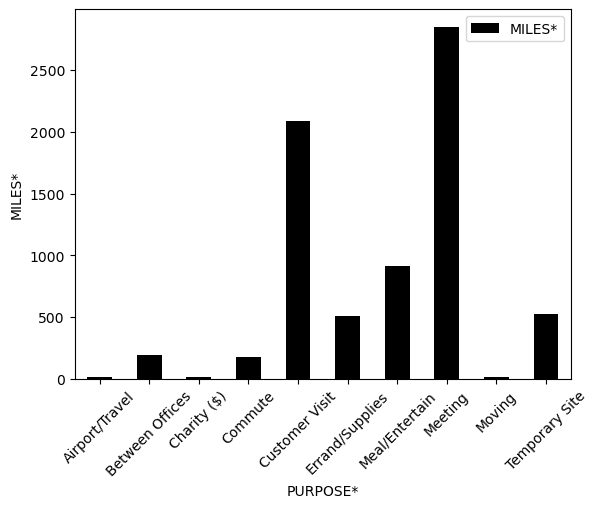

In [68]:
df=pd.DataFrame(df_uber['MILES*'].groupby(df_uber['PURPOSE*']).sum())
df.plot(kind='bar',color='black')
plt.xlabel('PURPOSE*')
plt.ylabel('MILES*')
plt.xticks(rotation=45)

plt.show()

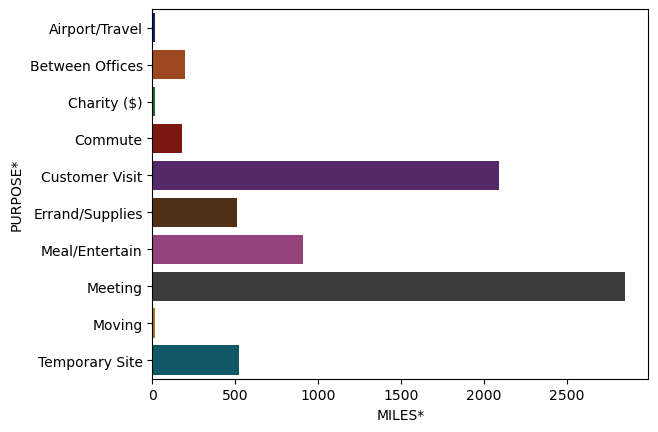

In [69]:
#or

df=df.reset_index()
sns.barplot(x=df['MILES*'],y=df['PURPOSE*'],palette='dark')

plt.show()

In [70]:
df

,PURPOSE*,MILES*
0,Airport/Travel,16.5
1,Between Offices,197.0
2,Charity ($),15.1
3,Commute,180.2
4,Customer Visit,2089.5
5,Errand/Supplies,508.0
6,Meal/Entertain,911.7
7,Meeting,2851.3
8,Moving,18.2
9,Temporary Site,523.7


In [71]:
df_uber[df_uber['PURPOSE*'] =='Airport/Travel']

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
683,8/21/2016 10:00,8/21/2016 10:29,Business,Unknown Location,Unknown Location,7.6,Airport/Travel
1055,12/17/2016 15:38,12/17/2016 16:12,Business,Unknown Location,Unknown Location,4.8,Airport/Travel
1137,12/29/2016 13:56,12/29/2016 14:11,Business,Kar?chi,Kar?chi,4.1,Airport/Travel


In [72]:
df =pd.DataFrame(df_uber['CATEGORY*'].value_counts())
df

,count
CATEGORY*,
Business,1078
Personal,77


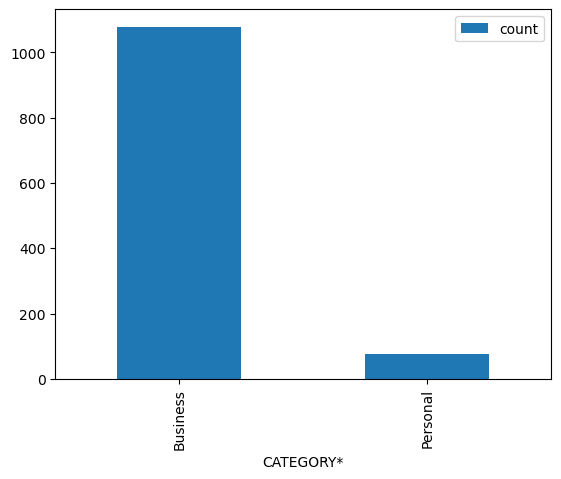

In [73]:
df=pd.DataFrame(df_uber['CATEGORY*'].value_counts())
df.reset_index()
df.plot(kind='bar')
plt.show()

<Figure size 1000x600 with 0 Axes>

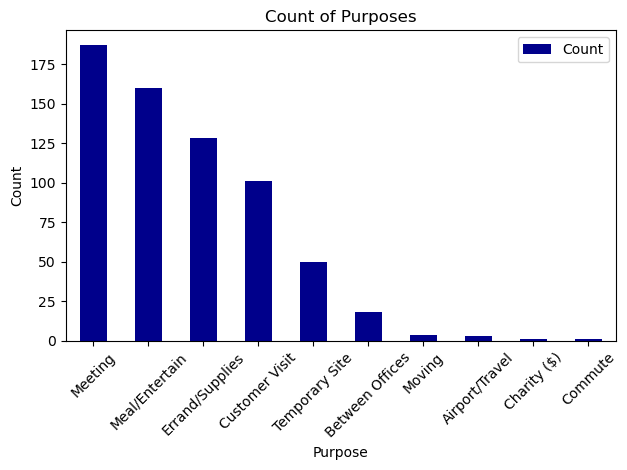

In [74]:
df = pd.DataFrame(df_uber['PURPOSE*'].value_counts()).reset_index()
df.columns = ['Purpose', 'Count']  # Rename columns for clarity

plt.figure(figsize=(10, 6))
df.plot(kind='bar', x='Purpose', y='Count',color='darkblue')

# Add titles and labels
plt.title('Count of Purposes')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()

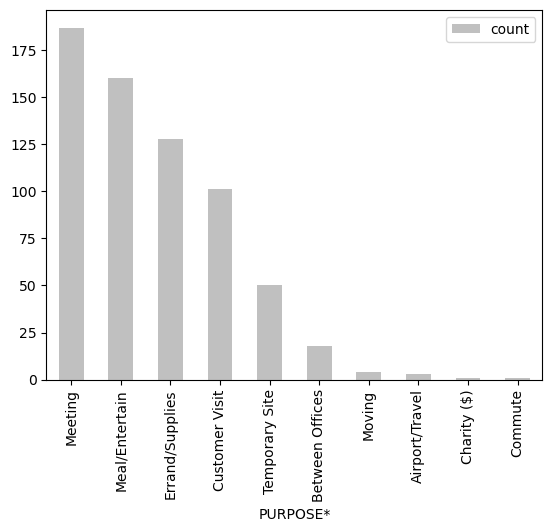

In [75]:
df=pd.DataFrame(df_uber['PURPOSE*'].value_counts())
df.reset_index()
df.plot(kind='bar',color='silver')
plt.show()

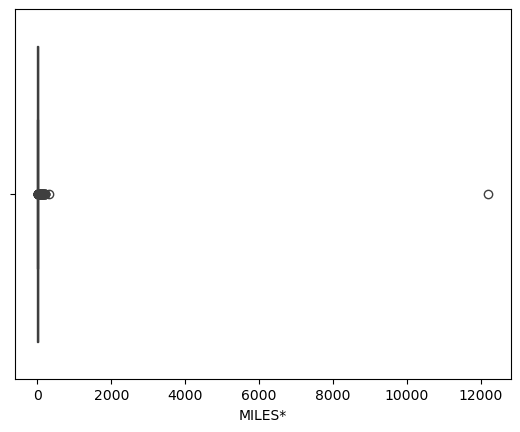

In [76]:
sns.boxplot(x=df_uber['MILES*'])
plt.show()

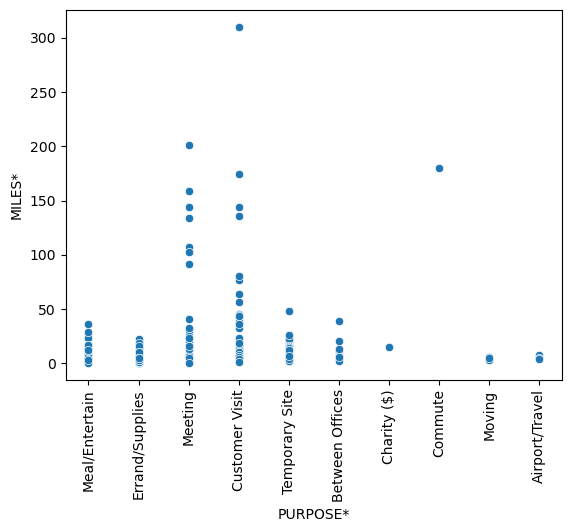

In [77]:
sns.scatterplot(x=df_uber['PURPOSE*'],y=df_uber['MILES*'])
plt.xticks(rotation=90)
plt.show()

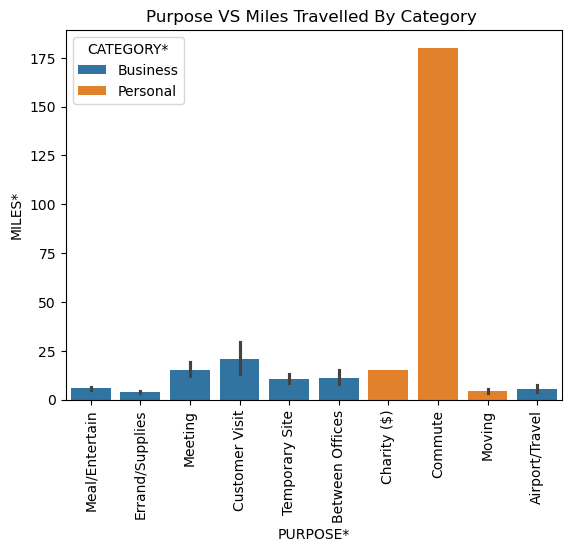

In [78]:
sns.barplot(x= df_uber['PURPOSE*'], y= df_uber['MILES*'],hue = df_uber['CATEGORY*'])
plt.title("Purpose VS Miles Travelled By Category ")
plt.xticks(rotation=90)
plt.show()

In [79]:
pd.crosstab(df_uber['CATEGORY*'],df_uber['PURPOSE*'],margins=True)

PURPOSE*,Airport/Travel,Between Offices,Charity ($),Commute,Customer Visit,Errand/Supplies,Meal/Entertain,Meeting,Moving,Temporary Site,All
CATEGORY*,,,,,,,,,,,
Business,3,18,0,0,101,128,160,187,0,50,647
Personal,0,0,1,1,0,0,0,0,4,0,6
All,3,18,1,1,101,128,160,187,4,50,653


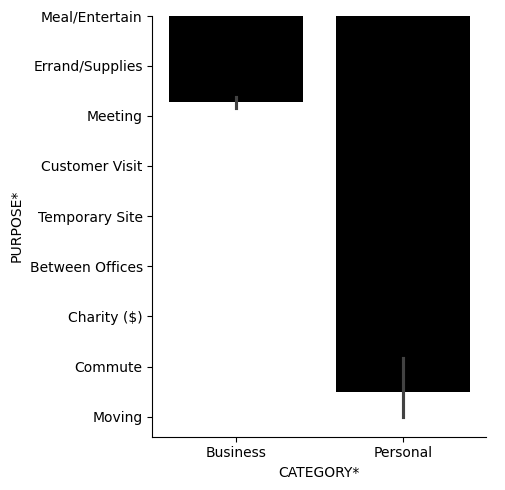

In [80]:
sns.catplot(x='CATEGORY*',y='PURPOSE*',data=df_uber,kind='bar',color='black')
plt.show()

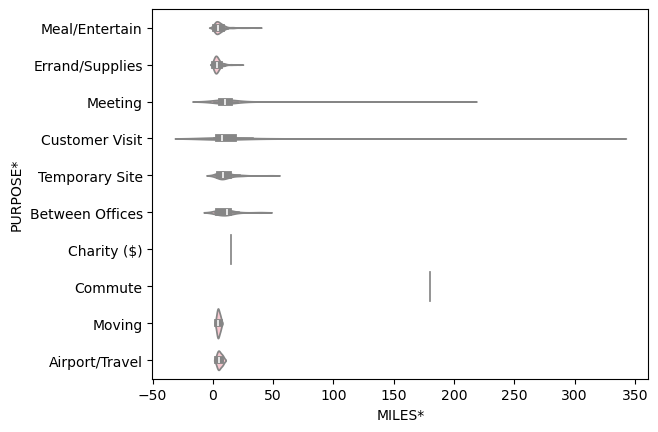

In [81]:
sns.violinplot(x='MILES*',y='PURPOSE*',data=df_uber,color='pink')
plt.show()